In [6]:
from scipy.optimize import fmin
from scipy.optimize import rosen_der
from scipy.optimize import minimize
from scipy.optimize import fsolve
from sympy import *

import math
import numpy as np
import matplotlib.pyplot as plt


from scipy.optimize import curve_fit

In [7]:
485*conv*mu0

0.0485000000000000

In [8]:
mu0 = 4*pi*1e-7
conv = 1e3/4/pi

def params():
    #CGS
    Ms = 200e3/conv
    Ms = 942
    fpMeff = 22099 #G
    Hc = 5 #Oe
    
    phiH = 20

    return Ms, fpMeff, Hc, phiH


def totE(Hext):
    #SI
    Ms, Meff, Hc, phiH = params()
    m = symbols('m')
    func = -Hext*(cos((phiH-m)*pi/180))+1/8*Hc*(sin(2*m*pi/180)**2)


    return func




In [9]:
#cgs unit
Hext = 5/mu0/conv
func = totE(Hext)
m = symbols('m')
func_func = lambdify(m, func, 'numpy')
print(func)


phiH = 20
result = minimize(func_func, phiH,  method='BFGS',tol=1e-6)
print(result)   

0.625*sin(pi*m/90)**2 - 50000.0*cos(pi*(1/9 - m/180))
      fun: -49999.74178020911
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([19.99859007])


19.996475080538524


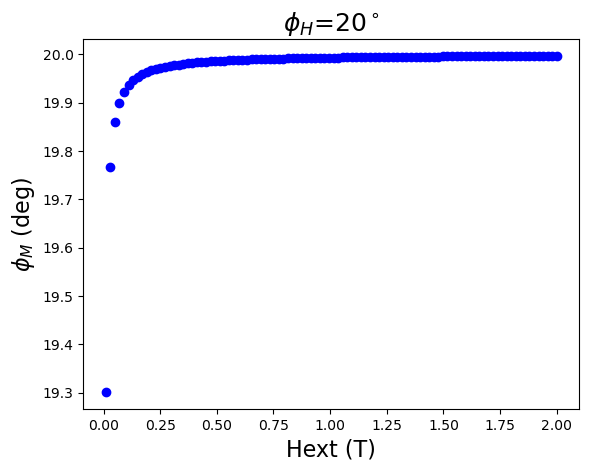

In [10]:
# use diff+minimize to solve for phiM

Hexts_SI = np.linspace(.01,2,100)
Hexts = Hexts_SI/mu0/conv

m = symbols('m')

for Hext in Hexts:
    f = totE(Hext)
    f_func = lambdify(m, f, 'numpy')
    
    result = minimize(f_func, phiH, method= 'BFGS' ,tol=1e-6)

    plt.scatter(Hext*conv*mu0,result.x[0],color='blue')

plt.xlabel('Hext (T)',fontsize=16)
plt.ylabel('$\phi_M$ (deg)',fontsize=16)
plt.title('$\phi_H$=20$^\circ$',fontsize=18)
print(result.x[0])


In [16]:
def resfreq(Hext, phiM, Ms, Meff,   Hc, phiH):
    #SI unit
    gamma = 1.760859e-2
    gamma_o2pi = gamma/2/pi
    fres = gamma_o2pi*sqrt((Hext*cos((phiH-phiM)*pi/180)+Meff+0.5*Hc*(1+cos((4*phiM))*pi/180))*(Hext*cos((phiH-phiM)*pi/180)+Hc*cos(4*phiM*pi/180)))
#     fres = gamma_o2pi*sqrt((mu0*conv*Hext*cos((phiH-phiM)*pi/180)+mu0*conv*Meff+0.5*mu0*conv*Hc*(1+cos((4*phiM))*pi/180))*(mu0*conv*Hext*cos((phiH-phiM)*pi/180)+mu0*conv*Hc*cos(4*phiM*pi/180)))
    
    return fres

    

In [17]:
def kittel(Hext,muHc,Meff):
    gamma = 1.760859e11
#     print(Hext+Hc)
#     print(Hext+Hc+fpMeff)
    f = gamma/(2*np.pi)*sqrt((Hext+muHc)*(Hext+muHc+Meff))
    return f

[ 8.67581639  8.93217187  9.14822854  9.33856553  9.5121003   9.67233446
  9.82695931  9.98128183 10.13057745 10.28568644 10.43792416 10.59750853
 10.75689923 10.92016614 11.08946924 11.25815252 11.43078464 11.60901737
 11.78788973 11.96696165 12.14945954 12.33564283 12.52287496 12.70950303
 12.89618535 13.08432982 13.27438107 13.46559215 13.65682308 13.84727266
 14.03682223 14.22582271 14.41473108 14.60385716 14.79323506 14.98265348
 15.17181501 15.36037228 15.54807533 15.7347762  15.92046045 16.1051435
 16.28894218 16.47197239 16.65432426 16.83608212 17.017294   17.19797501
 17.37812042 17.55769262]
[0.001      0.00485714 0.00871429 0.01257143 0.01642857 0.02028571
 0.02414286 0.028      0.03185714 0.03571429 0.03957143 0.04342857
 0.04728571 0.05114286 0.055      0.05885714 0.06271429 0.06657143
 0.07042857 0.07428571 0.07814286 0.082      0.08585714 0.08971429
 0.09357143 0.09742857 0.10128571 0.10514286 0.109      0.11285714
 0.11671429 0.12057143 0.12442857 0.12828571 0.13214286 

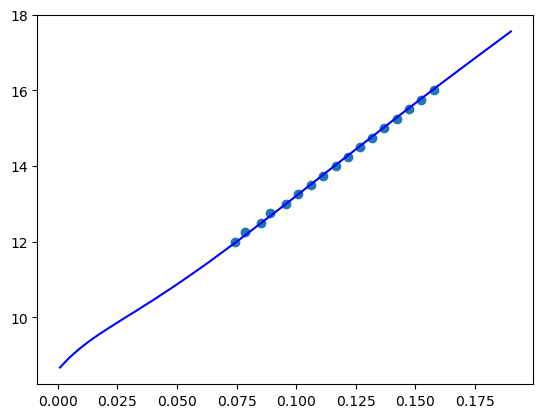

In [56]:
def params():
    #CGS
    Ms = 200e3/conv
    fpMeff = 18548 #G
    Hc = -515 #Oe
    Ku=0
    phiH = 70

    return Ms, fpMeff, Hc, phiH

Hexts_SI = np.linspace(.001,0.19,50)
Hexts = Hexts_SI/mu0/conv
m = symbols('m')

Ms, fpMeff, Hc, phiH = params()

freqs = np.zeros(len(Hexts))

for idx,Hext in enumerate(Hexts):
    func = totE(Hext)
    f_func = lambdify(m, func, 'numpy')
    
    result = minimize(f_func, phiH, method= 'BFGS' ,tol=1e-6)
    phim = result.x[0]

    f = resfreq(Hext,phim,Ms, fpMeff,   Hc, phiH)

    
    freqs[idx]=np.real(f)
plt.plot(Hexts_SI,freqs,color='blue',label='Hc=450')




np.savetxt('theoH.txt', Hexts_SI)
np.savetxt('theoF.txt', freqs)
print(freqs)
print(Hexts_SI)


H0 = np.array([ 744.4536807,   784.33620826,  852.88345624 , 890.33154422 , 956.22442902,
 1009.10069489 ,1061.0678652 , 1112.77803454 ,1166.72510764 ,1216.97367015,
 1266.54551414, 1317.75278633 ,1367.9809795 , 1422.28070425 ,1471.48894799,
 1524.00398297 ,1579.47973027]) #Oe
f = np.array([12. ,  12.25, 12.5 , 12.75 ,13. ,  13.25, 13.5,  13.75 ,14.,   14.25 ,14.5,  14.75,
 15. ,  15.25, 15.5 , 15.75, 16.  ])
            
plt.scatter(H0*1e-4,f)

[ 9.31862285  9.58858918  9.8338774  10.06925111 10.30226715 10.53956733
 10.76712819 11.02064268 11.26769864 11.52924223 11.79201085 12.06896736
 12.34502219 12.6232009  12.90878014 13.18965108 13.47721258 13.76679592
 14.05669832 14.34639022 14.63392242 14.91958137 15.20079183 15.48674827
 15.77193779 16.05600979 16.33838755 16.61865949 16.89662555 17.17234058
 17.44599681 17.71549761 17.98708304 18.25668701 18.52451967 18.7907135
 19.05533916 19.3184103  19.57999645 19.84064527 20.0996993  20.35715002
 20.61298179 20.86721992 21.11989849 21.37104027 21.62069623 21.86890801
 22.11573623 22.3612328 ]


C:\Users\zzz55\AppData\Local\Temp\ipykernel_23672\2543838281.py:3: RuntimeWarning: invalid value encountered in sqrt
  f = gamma/(2*np.pi)*np.sqrt((Hext+Ba)*(Hext+Ba+fpMeff))


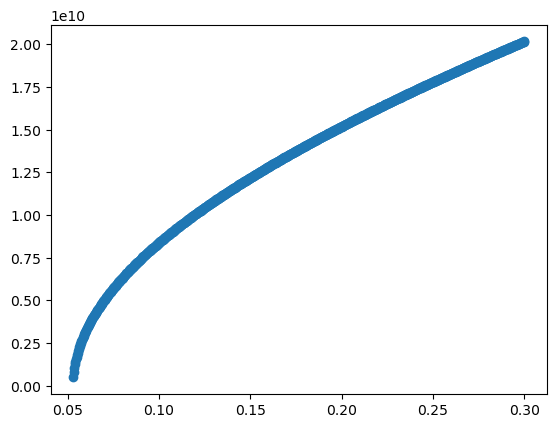

In [23]:
Ms, fpMeff, Ku, Hu, Hc, phiH = params()
Hext = np.linspace(0,0.3,num=1000)
f = kittel(Hext,Hc,fpMeff)
plt.scatter(Hext,f)
# np.savetxt('theoH.txt', Hexts)
# np.savetxt('theoF.txt', freqs)
print(freqs)

In [51]:
spectrum = np.loadtxt('spectrum-f-b.txt',delimiter=',')
field = np.loadtxt('field.txt',delimiter=',')
field = np.arange(10,111,step=25)
print(len(field))
freq = np.loadtxt('freq.txt',delimiter=',')
row = np.size(spectrum,axis=0)
col = np.size(spectrum,axis=1)
print('The size of the 2D spectrum is [' + str(row) + 'x' + str(col) + '].')


5
The size of the 2D spectrum is [3001x44].


X-axis ticks: [-5.  0.  5. 10. 15. 20. 25. 30. 35. 40. 45.]
Y-axis ticks: [-500.    0.  500. 1000. 1500. 2000. 2500. 3000. 3500.]
[0.01  0.021 0.032 0.043 0.054 0.065 0.076 0.087 0.098 0.109 0.12 ]
[ 0.          0.89795918  1.79591837  2.69387755  3.59183673  4.48979592
  5.3877551   6.28571429  7.18367347  8.08163265  8.97959184  9.87755102
 10.7755102  11.67346939 12.57142857 13.46938776 14.36734694 15.26530612
 16.16326531 17.06122449 17.95918367 18.85714286 19.75510204 20.65306122
 21.55102041 22.44897959 23.34693878 24.24489796 25.14285714 26.04081633
 26.93877551 27.83673469 28.73469388 29.63265306 30.53061224 31.42857143
 32.32653061 33.2244898  34.12244898 35.02040816 35.91836735 36.81632653
 37.71428571 38.6122449  39.51020408 40.40816327 41.30612245 42.20408163
 43.10204082 44.        ]


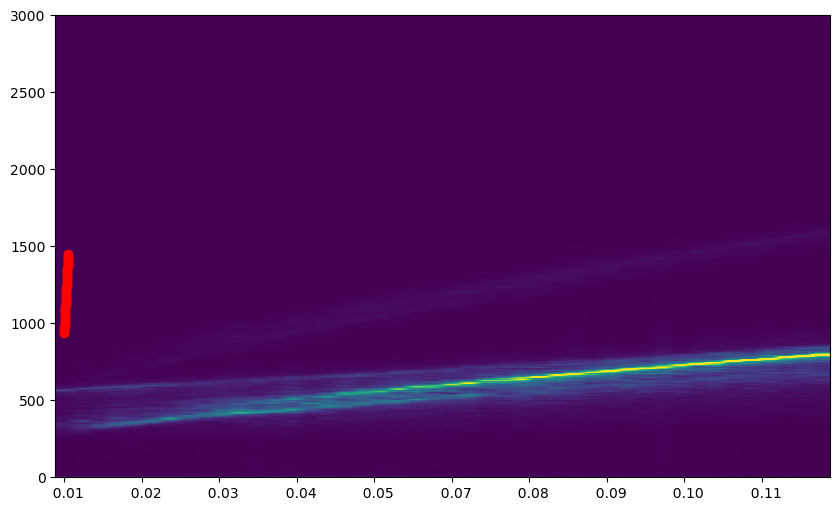

50


In [111]:
aspectratio = row/col

fig,ax = plt.subplots(figsize=(10,6))

ax.imshow(spectrum,aspect='auto',vmin=0,vmax=5,origin='lower')
# ax.imshow(spectrum,aspect='auto',vmin=0,vmax=5)

xticks = plt.xticks()[0]
yticks = plt.yticks()[0]

# Display the tick information
print("X-axis ticks:", xticks)
print("Y-axis ticks:", yticks)


ticks_x = np.linspace(0,44,len(xticks))
ticklab_x = 0.01+ticks_x*0.0025
ticklabels_x = ["{:6.2f}".format(i) for i in ticklab_x]
print(ticklab_x)
print(hticks)

# ticks_y = np.linspace(0,3001,11)
# ticklab_y = 0 + ticks_y*(50/3001)
# ticklabels_y = ["{:6.2f}".format(i) for i in ticklab_y]

ax.set_xticks(ticks_x)
ax.set_xticklabels(ticklabels_x)
# ax.set_yticks(ticks_y)
# ax.set_yticklabels(ticklabels_y)

# ax.set_ylim([200,1200])
# plt.xticks(np.arange(len(field)),field)

hticks = np.linspace(0,50,len(Hexts))
ax.scatter(Hexts+hticks*0.0025,freqs*100,color='red')
plt.show()

print(np.size(freqs))
